<a href="https://colab.research.google.com/github/jennifergc/fits_plotting_tool/blob/main/Fits_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import statsmodels
from astropy.io import fits
#import matplotlib.pyplot as pltfrom astropy.io import fits
from matplotlib.widgets import RectangleSelector
import ipywidgets as widgets
from IPython.display import display

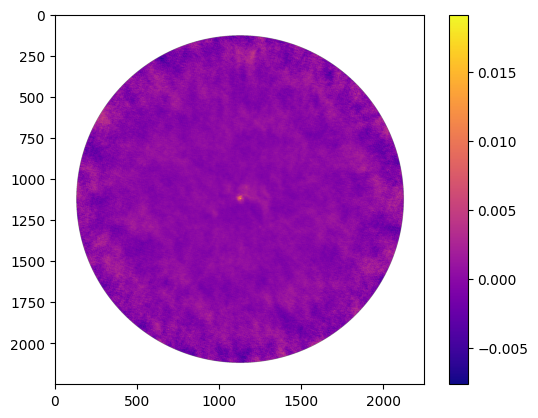

In [ ]:
# Abre el archivo .fits
hdul = fits.open('/content/ALMA01582922_CONTI_P2019.fits')

# Accede a los datos
datos = hdul[0].data

# Selecciona la parte de los datos que deseas graficar.
# Asumiendo que deseas la primera imagen en el primer plano del cubo de datos:
datos_2d = datos[0, 0, :, :]

# Grafica los datos
plt.imshow(datos_2d, cmap='plasma')
plt.colorbar()
plt.show()

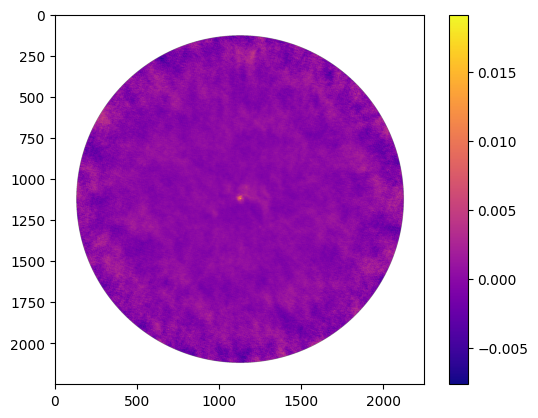

Button(description='Guardar recorte', style=ButtonStyle())

Por favor, selecciona una región antes de guardar.


In [ ]:
# Carga el archivo FITS
hdul = fits.open('/content/ALMA01582922_CONTI_P2019.fits')
datos = hdul[0].data
datos_2d = datos[0, 0, :, :]  # Ajusta esto si la estructura es diferente

# Variables globales para almacenar las coordenadas seleccionadas
coords = {"x_min": None, "x_max": None, "y_min": None, "y_max": None}

# Función para guardar las coordenadas de selección
def onselect(eclick, erelease):
    coords["x_min"], coords["x_max"] = int(min(eclick.xdata, erelease.xdata)), int(max(eclick.xdata, erelease.xdata))
    coords["y_min"], coords["y_max"] = int(min(eclick.ydata, erelease.ydata)), int(max(eclick.ydata, erelease.ydata))
    print(f"Región seleccionada: x=({coords['x_min']}:{coords['x_max']}), y=({coords['y_min']}:{coords['y_max']})")

# Crear la figura y la imagen
fig, ax = plt.subplots()
im = ax.imshow(datos_2d, cmap='plasma')  # Muestra la imagen
plt.colorbar(im, ax=ax)  # Barra de color asociada

# Añadir la herramienta de selección (sin argumentos no soportados)
selector = RectangleSelector(ax, onselect, interactive=True)

plt.show()
plt.pause(0.1)  # Asegura que se actualice correctamente en Google Colab

# Función para recortar y guardar la imagen seleccionada
def guardar_recorte():
    if None in coords.values():
        print("Por favor, selecciona una región antes de guardar.")
        return

    datos_recortados = datos_2d[coords["y_min"]:coords["y_max"], coords["x_min"]:coords["x_max"]]

    # Guardar el recorte como un nuevo FITS
    hdu = fits.PrimaryHDU(datos_recortados)
    hdul_recortado = fits.HDUList([hdu])
    hdul_recortado.writeto('/content/recorte.fits', overwrite=True)

    print("Imagen recortada guardada como 'recorte.fits'.")

# Botón interactivo para guardar la imagen recortada
boton_guardar = widgets.Button(description="Guardar recorte")
boton_guardar.on_click(lambda x: guardar_recorte())

display(boton_guardar)